**Importing Libraries & Reading Data [Darshil Shah]**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/spark foundation/deliveries.csv")
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
df1.shape

(179078, 21)

In [ ]:
df1.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
df1.fillna("no", axis = 1, inplace = True)
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,no,no,no
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,no,no,no
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,no,no,no
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,no,no,no
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,no,no,no


**Top 5 wicket keepers who has more stumpings in IPL**

In [ ]:
wk_stumping = df1[df1["dismissal_kind"] == "stumped"]["fielder"].value_counts()
wk_stumping.head()

MS Dhoni      38
RV Uthappa    32
KD Karthik    29
WP Saha       18
PA Patel      16
Name: fielder, dtype: int64

**Leading Wicket Takers of IPL**

In [ ]:
bowler = df1[["bowler", "dismissal_kind"]]
bowler = bowler[(bowler.dismissal_kind.isin(["caught", "bowled", "caught_and_bowled", "stumped", "lbw"]))]
bowler = bowler.groupby("bowler").count()
bowler.rename(columns = {"dismissal_kind": "no_of_wickets"}, inplace = True)
bowler = bowler.sort_values(by = "no_of_wickets", ascending = False)
bowler.head()

,no_of_wickets
bowler,
SL Malinga,165
A Mishra,153
PP Chawla,145
Harbhajan Singh,139
DJ Bravo,139


**Leading Run Scorers of IPL**

In [ ]:
batsman = df1[["batsman", "batsman_runs"]]
batsman = batsman.groupby("batsman").count()
batsman.rename(columns = {"batsman_runs": "most_runs"}, inplace = True)
batsman = batsman.sort_values(by = "most_runs", ascending = False)
batsman.head()

,most_runs
batsman,
V Kohli,4211
SK Raina,4044
RG Sharma,3816
S Dhawan,3776
G Gambhir,3524


**Most extra runs given by any team in IPL**

In [ ]:
extra = df1[["bowling_team", "extra_runs"]]
extra = extra.groupby("bowling_team").count()
extra.rename(columns = {"extra_runs": "most_extras"}, inplace = True)
extra = extra.sort_values(by = "most_extras", ascending = False)
extra

,most_extras
bowling_team,
Mumbai Indians,22517
Royal Challengers Bangalore,21236
Kolkata Knight Riders,20940
Kings XI Punjab,20782
Chennai Super Kings,19556
Delhi Daredevils,18725
Rajasthan Royals,17382
Sunrisers Hyderabad,12779
Deccan Chargers,9039


**Importing second dataset "matches.csv"**

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/spark foundation/matches.csv")
df2.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df2.shape

(756, 18)

In [ ]:
df2.drop(columns = ["umpire3"], axis = 1)
df2.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df2.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:

df2.fillna("WU", axis = 1, inplace = True)

**Team wins by runs **

In [ ]:
df2.groupby(["winner"])["win_by_runs"].value_counts()

winner               win_by_runs
Chennai Super Kings  0              48
                     13              3
                     18              3
                     24              3
                     38              3
                                    ..
Sunrisers Hyderabad  45              1
                     48              1
                     85              1
                     118             1
WU                   0               4
Name: win_by_runs, Length: 277, dtype: int64

**Team wins by wickets**

In [ ]:

df2.groupby(["winner"])["win_by_wickets"].value_counts()

winner               win_by_wickets
Chennai Super Kings  0                 52
                     5                 12
                     7                  9
                     6                  7
                     4                  6
                                       ..
Sunrisers Hyderabad  1                  1
                     3                  1
                     4                  1
                     10                 1
WU                   0                  4
Name: win_by_wickets, Length: 117, dtype: int64

**Creating a Dataframe that indicates wins by teams**

In [ ]:
win  = df2["winner"].value_counts()
win

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
WU                               4
Name: winner, dtype: int64

In [ ]:
win_df = pd.DataFrame(columns = ["Team", "Wins"])

for i in win.iteritems():
  temp_df2 = pd.DataFrame(
      {
          "Team": [i[0]],
          "Wins": [i[1]]
      }
  )
  win_df = win_df.append(temp_df2, ignore_index = True)  

win_df

,Team,Wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


**Graph of team wins in IPL**

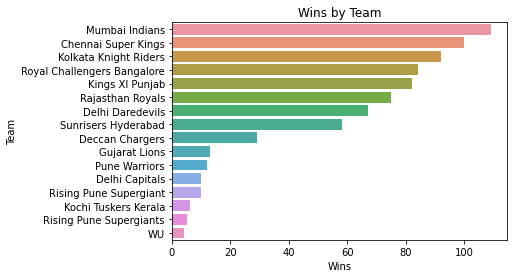

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title("Wins by Team")
plt.xlabel("Wins")
plt.ylabel("Team")
sns.barplot(x = "Wins", y = "Team", data = win_df)

**Data Frame of players who won most MOTM throughout in IPL**

In [ ]:
val_player = df2["player_of_match"].value_counts()
val_player

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
                  ..
KV Sharma          1
MD Mishra          1
A Joseph           1
S Aravind          1
RJ Harris          1
Name: player_of_match, Length: 227, dtype: int64

In [ ]:
val_player_df = pd.DataFrame(columns = ["Player", "Wins"])

for i in val_player.iteritems():
    temp_df1 = pd.DataFrame(
        {
            "Player": [i[0]],
            "Wins": [i[1]]
        }
    )
    val_player_df = val_player_df.append(temp_df1, ignore_index = True)

val_player_df.head(10)

,Player,Wins
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,DA Warner,17
4,RG Sharma,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,V Kohli,12


Text(0.5, 1.0, 'Most Valuable Players')

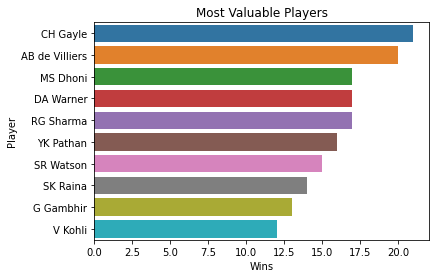

In [ ]:

sns.barplot(x = "Wins", y = "Player", data = val_player_df.head(10))
plt.title("Most Valuable Players")

**The team who won toss most no. of times**

In [ ]:
toss_winner = df2["toss_winner"].value_counts()
toss_winner


Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [ ]:
toss_winner_df = pd.DataFrame(columns = ["Team", "Toss Wins"])

for i in toss_winner.iteritems():
  temp_df3 =  pd.DataFrame(
      {
          "Team": [i[0]],
          "Toss Wins": [i[1]]
      }
  )
  toss_winner_df = toss_winner_df.append(temp_df3, ignore_index = True)

toss_winner_df

,Team,Toss Wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Kings XI Punjab,81
4,Royal Challengers Bangalore,81
5,Rajasthan Royals,80
6,Delhi Daredevils,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


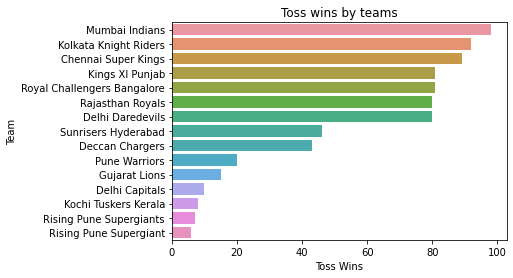

In [ ]:
plt.title("Toss wins by teams")
sns.barplot(x = "Toss Wins", y = "Team", data = toss_winner_df)

In [ ]:
defend = df2["win_by_runs"].value_counts()
defend.head()

0     419
14     13
4      11
10     11
1      10
Name: win_by_runs, dtype: int64

In [ ]:
chase = df2["win_by_wickets"].value_counts()
chase.head()

0    350
6     85
7     80
5     71
8     54
Name: win_by_wickets, dtype: int64